小波计算公式：
$ W(a, b) = \frac{1}{\sqrt{a}} \int_{-\infty}^{\infty} x(t) \Psi^*(\frac{t-b}{a})dt$

其中$\Psi^*$表示共轭

Morlet小波函数
$\Psi(t)=\pi^{-\frac{1}{4}}e^{i\omega_0t}e^{-\frac{t^2}{2}}$

对于Morlet小波函数，其共轭为：
$ \Psi^*(t) = \pi^{-\frac{1}{4}} e^{-i\omega_0 t} e^{-\frac{t^2}{2}} $

接下来，我们将 $ t $ 替换为 $ \frac{t-b}{a} $ 来得到小波变换中使用的Morlet小波函数：

$ \Psi^*\left(\frac{t-b}{a}\right) = \pi^{-\frac{1}{4}} e^{-i\omega_0 \frac{t-b}{a}} e^{-\frac{1}{2}\left(\frac{t-b}{a}\right)^2} $

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
import pywt

# 生成信号
# 生成随时间增加频率的正弦信号
t = np.linspace(0, 1, 1000, endpoint=False)  # 时间向量
f0 = 5  # 初始频率
fn = 50  # 最终频率
signal = chirp(t, f0, t[-1], fn, method='linear')  # 生成chirp信号

In [17]:
# 第二种信号
# t, signal = pywt.data.nino()

In [18]:
# # 第三种信号

# sampling_rate = 1024
# t = np.arange(0, 1.0, 1.0 / sampling_rate)
# f1 = 100
# f2 = 200
# f3 = 300
# f4 = 400
# signal = np.piecewise(t, [t < 1, t < 0.8, t < 0.5, t < 0.3],
#                     [lambda t: 400*np.sin(2 * np.pi * f4 * t),
#                      lambda t: 300*np.sin(2 * np.pi * f3 * t),
#                      lambda t: 200*np.sin(2 * np.pi * f2 * t),
#                      lambda t: 100*np.sin(2 * np.pi * f1 * t)])

In [19]:
def plot_cwt(origin, coefficients, frequencies, title="CWT"):
    # 绘制原始信号
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title('Original Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # 绘制小波变换结果
    plt.subplot(2, 1, 2)
    # plt.imshow(np.abs(coefficients), extent=[0, t[-1], 1, 128], cmap='jet', aspect='auto',
    #            vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())  另一种绘图方式
    plt.contourf(t, frequencies, abs(coefficients), cmap="jet")
    plt.axhline(50, ls=":", c="y")
    plt.yscale("log")
    plt.title(title)
    plt.ylabel('freqs')
    plt.xlabel('Time')
    plt.colorbar(label='Magnitude')

    plt.tight_layout()
    plt.show()

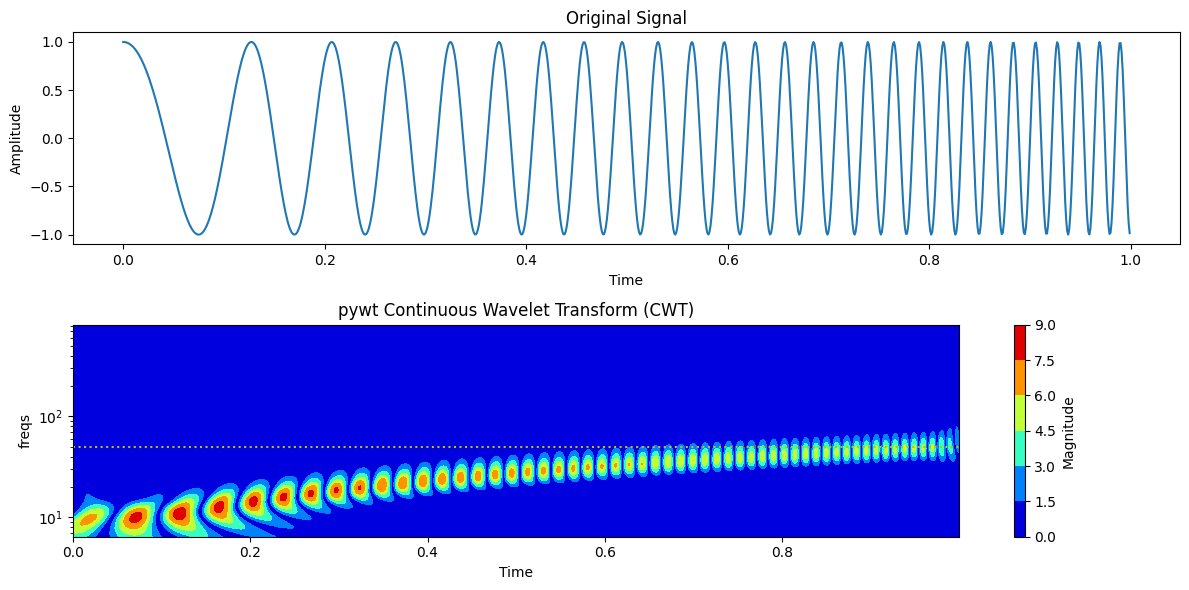

In [20]:
# 进行连续小波变换
# 使用pywt库
scales = np.arange(1, 128)  # 尺度范围
coefficients, frequencies = pywt.cwt(signal, scales, 'morl', sampling_period=(t[1] - t[0]))
plot_cwt(signal, coefficients, frequencies, title="pywt Continuous Wavelet Transform (CWT)")

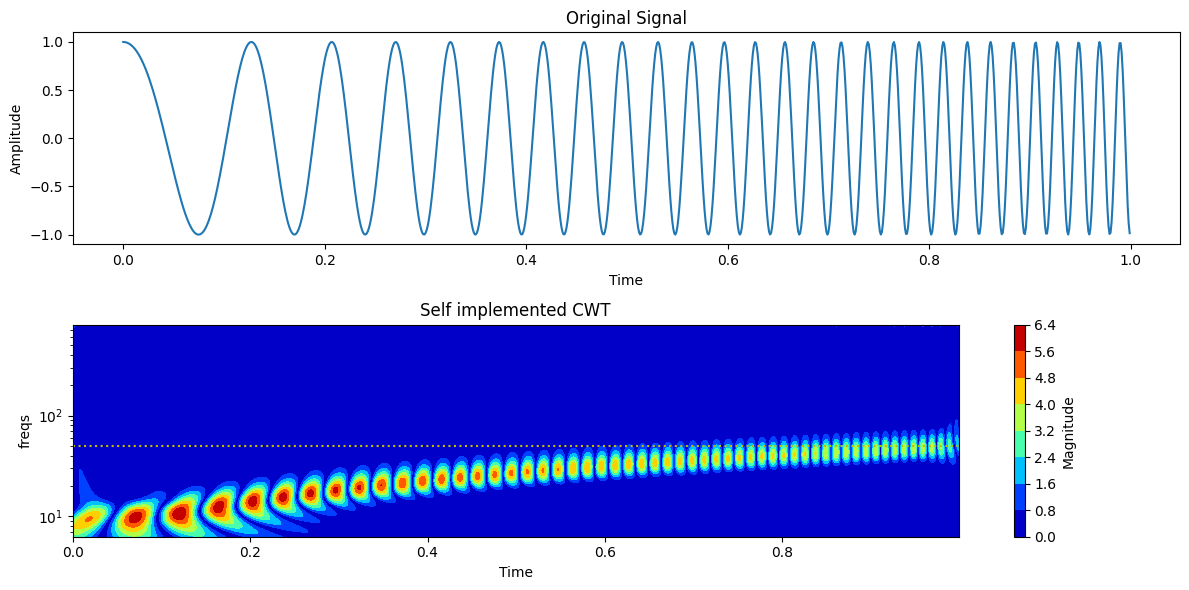

In [21]:
def morlet_wavelet(t, w=5, scale=1):
    """Morlet小波函数"""
    C = np.pi**(-0.25)
    wavelet =  C * np.exp(1j * w * t) * np.exp(-t**2 / 2)
    # 归一化小波函数
    norm = np.sqrt(scale)
    return  wavelet / norm

def continuous_wavelet_transform(signal, scales, sampling_period=1.):
    """连续小波变换（CWT）"""
    length = len(signal)
    # 为了用于滑动，所以是-length到length，而不是0到length，不然向右滑动之后就有缺少计算的值了
    time = np.arange(-length, length)
    coefficients = np.zeros((len(scales), length), dtype=complex)
    w0 = 5
    fc = w0 / (2 * np.pi) / sampling_period
    frequencies = fc / scales
    
    for i, scale in enumerate(scales):
        # 计算小波函数的平移版本
        wavelet = morlet_wavelet(time / scale, w=w0, scale=scale)
        # 计算共轭
        wavelet_conj = np.conj(wavelet)
        # 滑动求内积（可以用卷积来优化）
        for j in range(length):
            coefficients[i, j] = np.sum(signal[:] * wavelet_conj[length-j: 2*length-j]).real
    
    return coefficients, frequencies

# 设置尺度范围
scales = np.arange(1, 128)  # 尺度范围
# 执行小波变换
my_coeff, my_freqs = continuous_wavelet_transform(signal, scales, sampling_period=t[1] - t[0])
# 绘制结果
plot_cwt(signal, my_coeff, my_freqs, title="Self implemented CWT")

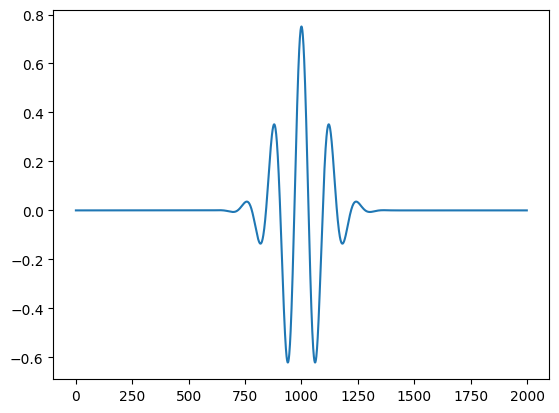

In [22]:
time = np.arange(-1000, 1000) * 1
wavelet = morlet_wavelet((time) / 100, w=5)

plt.plot(wavelet)
